<div class='alert alert-info'>
    <h1 align="center">Support Vector Machines</h1>
    <h3 align="center">Mo Rahdar</h3>
</div>

# Introduction
Support Vector Machines (SVMs) are a powerful class of supervised learning algorithms for classification and regression tasks. They work by finding the optimal hyperplane that separates data points of different classes in a high-dimensional space.

SVMs aim to find the hyperplane that best separates different classes of data points. A hyperplane is a decision boundary that divides the feature space into two separate classes. The goal is to maximize the margin, the distance between the hyperplane and the nearest data points from each class.

SVMs are unique in that they don't just find any hyperplane that separates the data; they aim to find the hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points (support vectors) from each class. Maximizing the margin helps improve the generalization ability of the model, making it less prone to overfitting.

Support vectors are the data points closest to the hyperplane and are crucial in determining the optimal hyperplane. These points are the ones that have a non-zero (positive) coefficient in the expression for the hyperplane.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()  # apply the default seaborn theme, scaling, and color palette

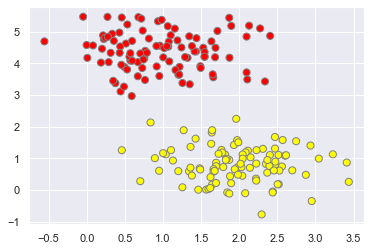

In [2]:
X, y = make_blobs(n_samples=200, centers=2,
                  cluster_std=.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='gray', cmap='autumn');

# if you want two different markers, you'll have to use two different calls to scatter.
# Matplotlib does not support different markers in one call to scatter.

What is the best-separating hyperplane?

SVM Answer: The one that maximizes the distance to the closest data points from both classes. We say it is the hyperplane
with maximum margin.

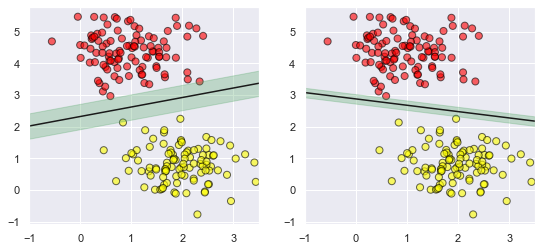

In [3]:
plt.figure(figsize=(14, 4))

# draw separators and margins
x_values = np.linspace(-1, 3.5)
for i, (w, b, m) in enumerate([(0.3, 2.325, 0.4), (-0.2, 2.88, 0.15)]):
    plt.subplot(1, 3, i + 1)
    
    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='autumn', alpha=0.6)
    y_values = w * x_values + b
    
    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='g', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

The left plot gives you a better separation because it is less sensetive to hte noise in the training dataset, and it has a larger margin.

SVMs typically include a regularization parameter `C` that controls the trade-off between maximizing the margin and minimizing the classification error. Let's try different values for `C` on the dataset.

In [4]:
# defie a function to plot the decision boundary of a
# binary classification model along with its support vectors

def PlotDB(X, model, ax, plotSV=True):
    
    """
    Inputs:
        X: Input data points, assumed to be a 2D array with shape (n_samples, 2)
        model: The trained binary classification model, such as a SVM
        ax: The matplotlib axis object to plot decision boundary and support vectors
        plotSV: A boolean parameter indicating whether to plot the support vectors or not
    """
    
    u_min, u_max = X[:, 0].min()-3, X[:, 0].max()+3
    v_min, v_max = X[:, 1].min()-3, X[:, 1].max()+3
    
    # create a grid of points (xx, yy) covering the entire feature space
    U, V = np.meshgrid(np.arange(u_min, u_max, .02),
                       np.arange(v_min, v_max, .02))
    Z = model.decision_function(np.c_[np.ravel(U), np.ravel(V)])
    
    V = V.reshape(U.shape)
    Z = Z.reshape(U.shape)

    # plot decision boundary and margins
    cntr = ax.contour(U, V, Z,  levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'], colors='k')
    
    # plot support vectors
    if plotSV:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='b')

## Softening Margins
The optimal value of the C parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.

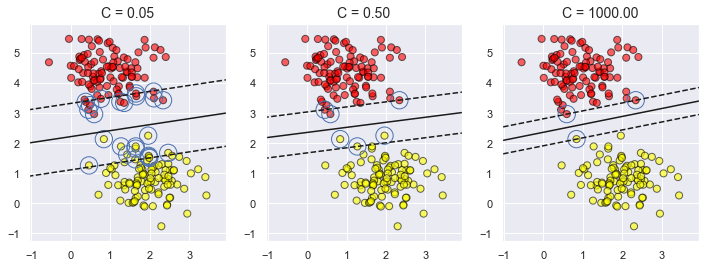

In [5]:
C = [0.05, .5, 1000] # regularization parameter

# create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12,4))

for i, ax in enumerate(axes):
    
    # create an SVM classifier with a linear kernel
    Lsvc = SVC(kernel='linear', C=C[i]).fit(X, y)
    
    # plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='autumn', alpha=0.6)
    
    # plot the separating hyperplane with its margins
    PlotDB(X, Lsvc, ax)
    
    # set the title of the current subplot
    ax.set_title('C = %.2f' %C[i], fontsize=14)
    
    ax.set_xlim([X[:, 0].min()-.5, X[:, 0].max()+.5])
    ax.set_ylim([X[:, 1].min()-.5, X[:, 1].max()+.5])

plt.show()

Regularization parameter `C` controls the balance between the width of the margin and penalties for margin violations.

A smaller `C` value allows for a wider margin but may lead to misclassification errors. In comparison, a larger `C` value aims to minimize classification errors, even if it means sacrificing some margin.

In [6]:
def plotSVM(N=10):
    """
    plotSVM that generates a scatter plot of a synthetic dataset with
    two classes, fits a Support Vector Machine (SVM) classifier with a
    linear kernel to the data, and visualizes the decision boundary along
    with the support vectors.
    The number of samples in the dataset can be controlled interactively
    using a widget slider.
    
    N: The number of samples to be generated in the synthetic dataset.
       It is initially set to 10 and can be adjusted using a widget slider.
    """
    X, y = make_blobs(n_samples=200, centers=2,
                      cluster_std=.6, random_state=0)
    
    # restrict the dataset to the first N samples
    X, y = X[:N], y[:N]
    
    # create an SVM classifier with a linear kernel
    Lsvc = SVC(kernel='linear', C=1000).fit(X, y)
    
    # scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='gray', cmap='autumn')
    
    # plot the separating hyperplane with its margins
    PlotDB(X, Lsvc, plt.gca())
    
    plt.xlim([0,3.5])
    plt.ylim([0,6])

    
# the interactive visualization, which updates the plot whenever
# the value of N changes via the widget slider
N = widgets.IntSlider(value=50, min=10, max=200, step=10, description='N:')
widgets.interact(plotSVM, N=N);

interactive(children=(IntSlider(value=50, description='N:', max=200, min=10, step=10), Output()), _dom_classes…

# Beyond linear boundaries: Kernel SVM
SVMs can efficiently handle non-linearly separable data by implicitly mapping the input data into a higher-dimensional space through a mathematical function called a kernel function. This allows SVMs to find a linear separation in the higher-dimensional space, which corresponds to a non-linear separation in the original feature space. Common kernel functions include the `linear`, `poly`, and `rbf` (radial basis function) kernels.

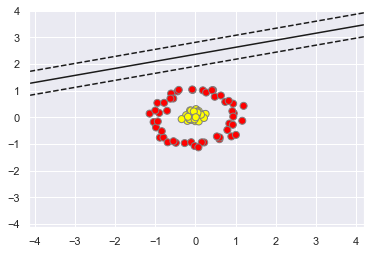

In [7]:
# generate a synthetic dataset with samples arranged in concentric circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=3)

# create an SVM classifier with a linear kernel
Ksvc = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='gray', cmap='autumn');
PlotDB(X, Lsvc, plt.gca(), plotSV=False)

No linear discrimination will ever be able to separate this data. We might project the data into a higher dimension such that a linear separator would be sufficient.

The main idea here is
- Start with data in a relatively low dimension.
- Move the data to a higher dimension.
- Find a support vector classifier that separates the higher dimensional data into two groups.

Let's try adding an additional dimension, the radial distance from the origin. It uses the formula $ e^{-\sum_{i=1}^{2} x_i^2} $, where $x_i$ represents the coordinates of each data point.

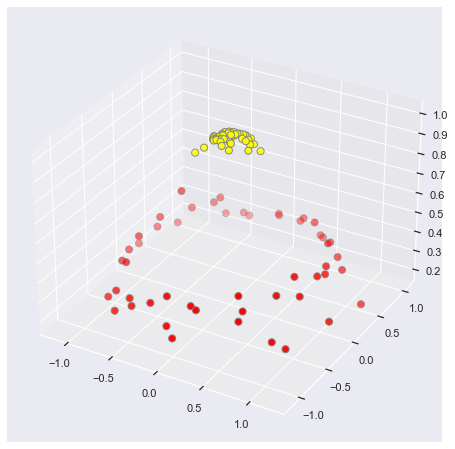

In [8]:
# calculate the values for the additional dimention
r = np.exp(-(X ** 2).sum(1))

fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, edgecolor='gray', cmap='autumn')

plt.show()

We can see that with this additional dimension, the data becomes trivially linearly separable. In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter.

In [9]:
Ksvc = SVC(kernel='rbf').fit(X,y)

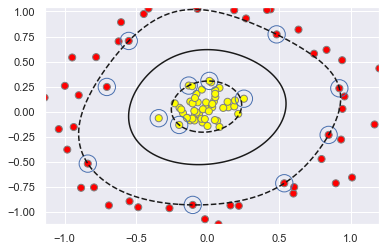

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='gray', cmap='autumn');
PlotDB(X, Ksvc, plt.gca())

plt.xlim([X[:, 0].min(), X[:, 0].max()])
plt.ylim([X[:, 1].min(), X[:, 1].max()])

plt.show()